In [5]:
import numpy as np
import matplotlib.pyplot as plt

# **Data**

In [13]:
t=[0,5*60,10*60,15*60,20*60,25*60,30*60,35*60,40*60,45*60] # s
T=[88,68.5,57.5,51,46,42,39,36.5,34,32.5] # °C

In [23]:
print(t)
print(T)

[   0  300  600  900 1200 1500 1800 2100 2400 2700]
[88.  68.5 57.5 51.  46.  42.  39.  36.5 34.  32.5]


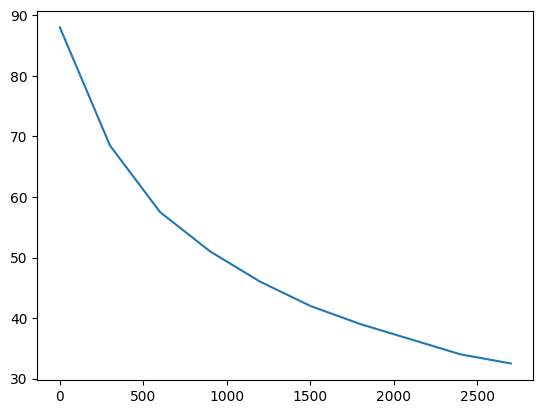

In [14]:
plt.plot(t,T)

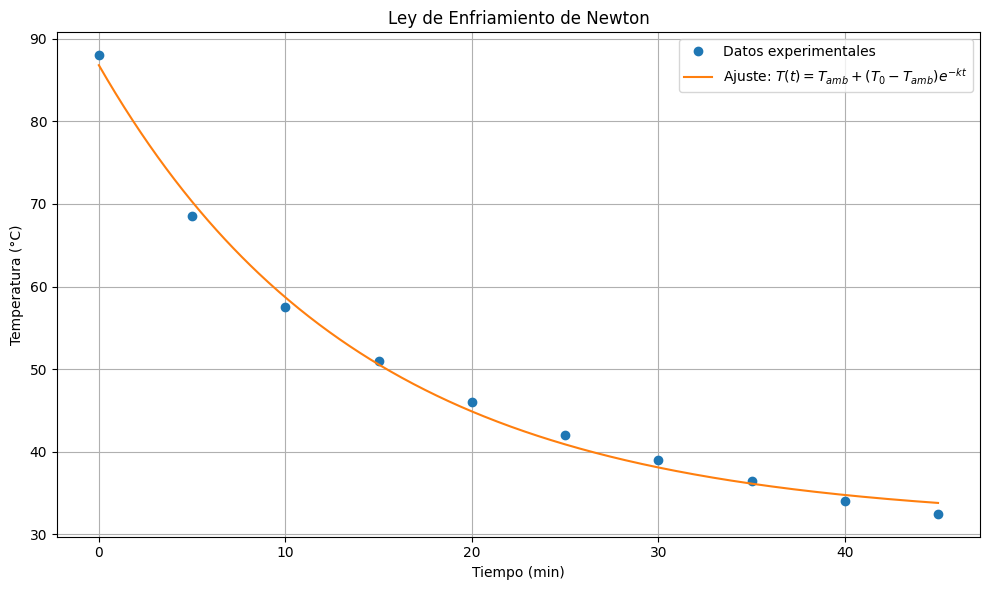

Parámetros ajustados:
T_amb = 31.56 ± 1.24 °C
T_0   = 86.80 ± 1.20 °C
k     = 0.001185 ± 0.000085 1/s


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t = np.array([0, 5*60, 10*60, 15*60, 20*60, 25*60, 30*60, 35*60, 40*60, 45*60])  # tiempo en segundos
T = np.array([88, 68.5, 57.5, 51, 46, 42, 39, 36.5, 34, 32.5])  # temperatura en °C

# Modelo de la ley de enfriamiento de Newton
def newton_cooling(t, T_amb, T0, k):
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# Estimación inicial de parámetros: [T_ambiente, T_inicial, k]
initial_guess = [25, 88, 0.001]

# Ajuste de curva no lineal
params, covariance = curve_fit(newton_cooling, t, T, p0=initial_guess)

# Parámetros ajustados
T_amb_fit, T0_fit, k_fit = params
# Errores estándar (desviaciones) de los parámetros ajustados
errors = np.sqrt(np.diag(covariance))

# Generar valores para graficar la curva ajustada
t_fit = np.linspace(0, max(t), 500)
T_fit = newton_cooling(t_fit, *params)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t / 60, T, 'o', label='Datos experimentales')  # Tiempo en minutos
plt.plot(t_fit / 60, T_fit, '-', label='Ajuste: $T(t) = T_{amb} + (T_0 - T_{amb}) e^{-kt}$')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Ley de Enfriamiento de Newton')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados en consola
print("Parámetros ajustados:")
print(f"T_amb = {T_amb_fit:.2f} ± {errors[0]:.2f} °C")
print(f"T_0   = {T0_fit:.2f} ± {errors[1]:.2f} °C")
print(f"k     = {k_fit:.6f} ± {errors[2]:.6f} 1/s")


Parámetros ajustados:
a = 55.2405
b = 0.001185
c = 31.5581


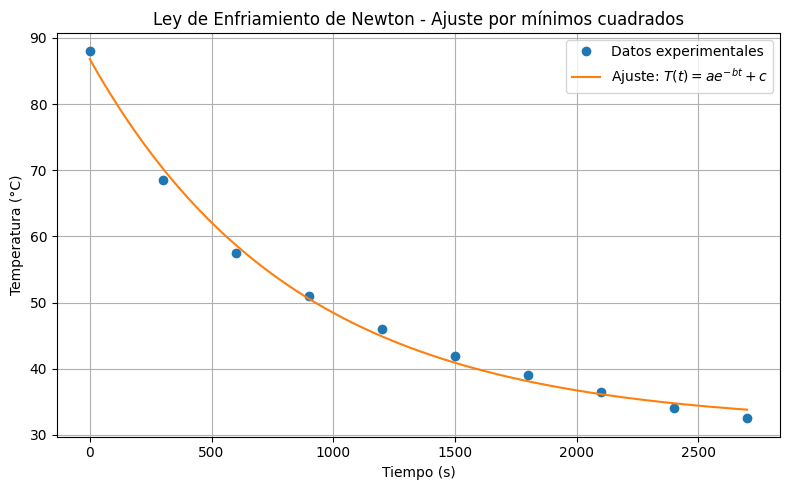

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t = np.array([0, 5*60, 10*60, 15*60, 20*60, 25*60, 30*60, 35*60, 40*60, 45*60])  # en segundos
T = np.array([88, 68.5, 57.5, 51, 46, 42, 39, 36.5, 34, 32.5])  # en grados Celsius

# Modelo propuesto: Ley de enfriamiento de Newton
def modelo(t, a, b, c):
    return a * np.exp(-b * t) + c

# Estimación inicial para [a, b, c]
a0 = T[0] - T[-1]
b0 = 0.001
c0 = T[-1]
param_inicial = [a0, b0, c0]

# Ajuste por mínimos cuadrados
param_opt, _ = curve_fit(modelo, t, T, p0=param_inicial)
a, b, c = param_opt

# Mostrar parámetros ajustados
print(f"Parámetros ajustados:")
print(f"a = {a:.4f}")
print(f"b = {b:.6f}")
print(f"c = {c:.4f}")

# Generar puntos para graficar la curva ajustada
t_fit = np.linspace(0, max(t), 300)
T_fit = modelo(t_fit, a, b, c)

# Graficar datos experimentales y modelo ajustado
plt.figure(figsize=(8, 5))
plt.plot(t, T, 'o', label='Datos experimentales')
plt.plot(t_fit, T_fit, '-', label='Ajuste: $T(t) = a e^{-bt} + c$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Ley de Enfriamiento de Newton - Ajuste por mínimos cuadrados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Parámetros ajustados:
a = 55.2405
b = 0.001185 (1/s)
c = 31.5581 (°C)

Coeficiente de determinación R² = 0.9957


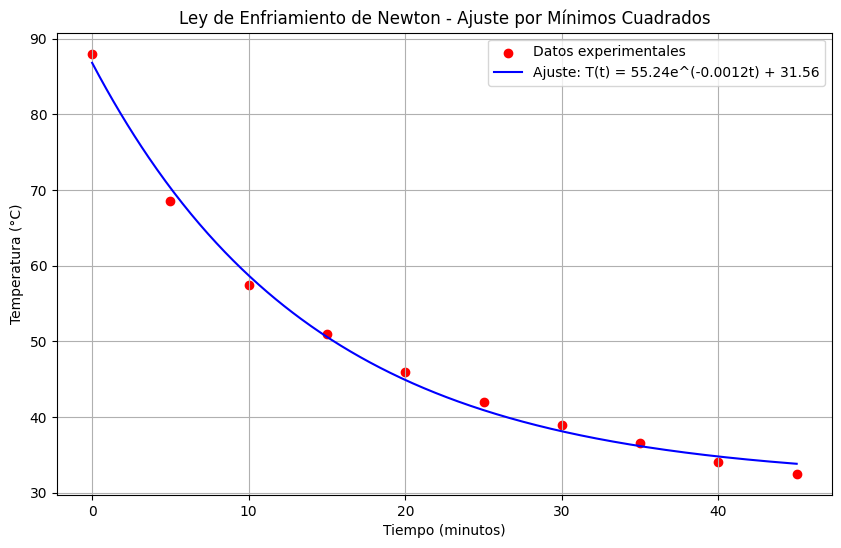


Temperatura ambiente estimada (t -> ∞): 31.56 °C


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t = np.array([0, 5*60, 10*60, 15*60, 20*60, 25*60, 30*60, 35*60, 40*60, 45*60])  # segundos
T = np.array([88, 68.5, 57.5, 51, 46, 42, 39, 36.5, 34, 32.5])  # °C

# Definir el modelo de enfriamiento: T(t) = a*exp(-b*t) + c
def model(t, a, b, c):
    return a * np.exp(-b * t) + c

# Ajustar el modelo a los datos usando mínimos cuadrados
params, covariance = curve_fit(model, t, T, p0=[1, 0.001, 30])  # Valores iniciales estimados

# Extraer los parámetros ajustados
a, b, c = params
print(f"Parámetros ajustados:")
print(f"a = {a:.4f}")
print(f"b = {b:.6f} (1/s)")
print(f"c = {c:.4f} (°C)")

# Calcular R²
residuals = T - model(t, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((T - np.mean(T))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nCoeficiente de determinación R² = {r_squared:.4f}")

# Crear puntos para la curva ajustada
t_fit = np.linspace(0, 45*60, 500)
T_fit = model(t_fit, a, b, c)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(t/60, T, color='red', label='Datos experimentales')
plt.plot(t_fit/60, T_fit, 'b-', label=f'Ajuste: T(t) = {a:.2f}e^(-{b:.4f}t) + {c:.2f}')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Ley de Enfriamiento de Newton - Ajuste por Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()

# Predicción de la temperatura ambiente (cuando t -> ∞)
print(f"\nTemperatura ambiente estimada (t -> ∞): {c:.2f} °C")

In [43]:
def expe(tiempo):
    return 55.2405*np.exp(-0.001185*tiempo) + 31.5581
def modelo(tiempo):
    return 32.5+(88-32.5)*np.exp(-0.001185*tiempo)

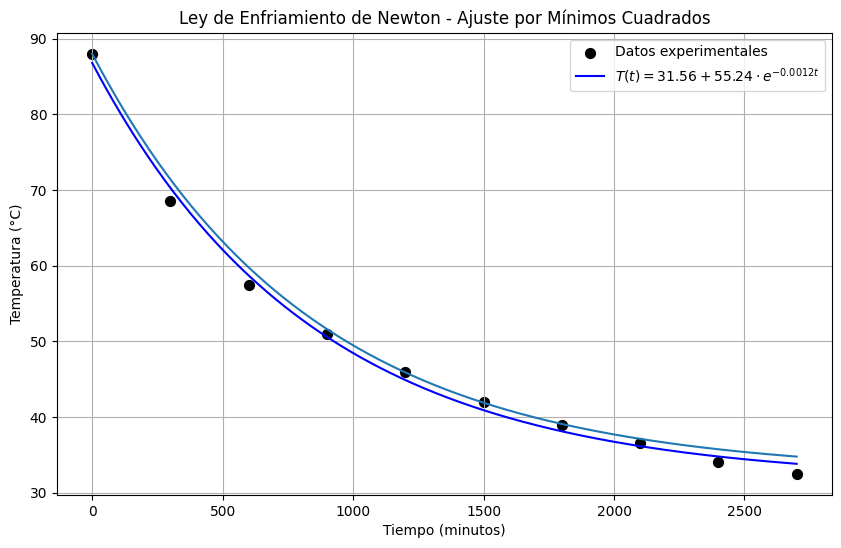


Temperatura ambiente estimada (t -> ∞): 31.56 °C


In [ ]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(t, T, color='black', label='Datos experimentales',s=50)
plt.plot(t_fit, expe(t_fit), 'b-', label=r'$T_{\text{exp}}(t)=31.56+55.24\cdot e^{-0.0012t}$')
plt.plot(t_fit,modelo(t_fit))
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Ley de Enfriamiento de Newton - Ajuste por Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()

# Predicción de la temperatura ambiente (cuando t -> ∞)
print(f"\nTemperatura ambiente estimada (t -> ∞): {c:.2f} °C")

=== Modelo Propuesto ===
a = 55.2405
b = 0.001185 (1/s)
c = 31.5581 °C (Temperatura ambiente estimada)
R² = 0.9957

=== Ley de Enfriamiento de Newton ===
T0 = 86.7986 °C (Temperatura inicial)
T_env = 31.5581 °C (Temperatura ambiente)
k = 0.001185 (1/s) (Constante de enfriamiento)
R² = 0.9957


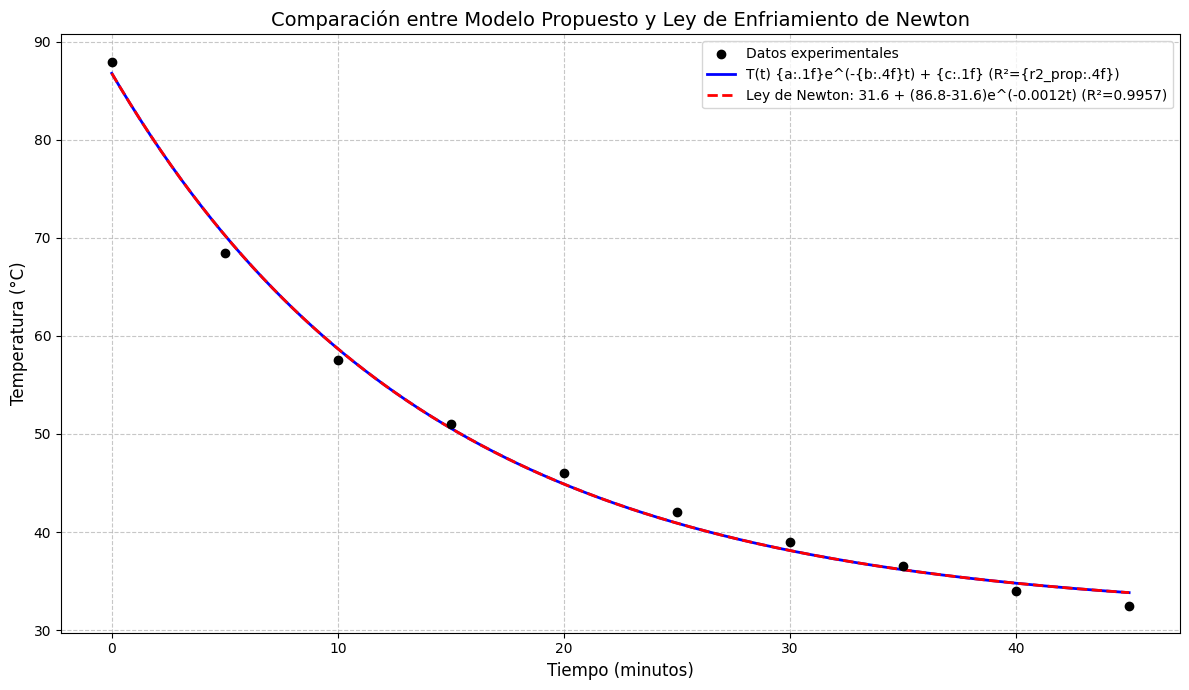

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
t = np.array([0, 5*60, 10*60, 15*60, 20*60, 25*60, 30*60, 35*60, 40*60, 45*60])  # segundos
T = np.array([88, 68.5, 57.5, 51, 46, 42, 39, 36.5, 34, 32.5])  # °C

# Modelo propuesto: T(t) = a*exp(-b*t) + c
def proposed_model(t, a, b, c):
    return a * np.exp(-b * t) + c

# Ley de Newton clásica: T(t) = T_env + (T0 - T_env)*exp(-k*t)
def newton_model(t, T0, T_env, k):
    return T_env + (T0 - T_env) * np.exp(-k * t)

# Ajustar ambos modelos a los datos
params_prop, _ = curve_fit(proposed_model, t, T, p0=[50, 0.001, 30])
params_newton, _ = curve_fit(newton_model, t, T, p0=[88, 30, 0.001])

# Extraer parámetros
a, b, c = params_prop
T0_newton, T_env_newton, k = params_newton

# Calcular R² para ambos modelos
def calculate_r_squared(model, params):
    residuals = T - model(t, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((T - np.mean(T))**2)
    return 1 - (ss_res / ss_tot)

r2_prop = calculate_r_squared(proposed_model, params_prop)
r2_newton = calculate_r_squared(newton_model, params_newton)

# Crear puntos para las curvas ajustadas
t_fit = np.linspace(0, 45*60, 500)
T_fit_prop = proposed_model(t_fit, a, b, c)
T_fit_newton = newton_model(t_fit, T0_newton, T_env_newton, k)

# Graficar comparativo
plt.figure(figsize=(12, 7))

# Datos experimentales
plt.scatter(t/60, T, color='black', label='Datos experimentales', zorder=3)

# Modelo propuesto
plt.plot(t_fit/60, T_fit_prop, 'b-', linewidth=2, 
         label=r'T(t) {a:.1f}e^(-{b:.4f}t) + {c:.1f} (R²={r2_prop:.4f})')

# Modelo de Newton
plt.plot(t_fit/60, T_fit_newton, 'r--', linewidth=2, 
         label=f'Ley de Newton: {T_env_newton:.1f} + ({T0_newton:.1f}-{T_env_newton:.1f})e^(-{k:.4f}t) (R²={r2_newton:.4f})')

plt.xlabel('Tiempo (minutos)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title('Comparación entre Modelo Propuesto y Ley de Enfriamiento de Newton', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar resultados numéricos
print("=== Modelo Propuesto ===")
print(f"a = {a:.4f}")
print(f"b = {b:.6f} (1/s)")
print(f"c = {c:.4f} °C (Temperatura ambiente estimada)")
print(f"R² = {r2_prop:.4f}\n")

print("=== Ley de Enfriamiento de Newton ===")
print(f"T0 = {T0_newton:.4f} °C (Temperatura inicial)")
print(f"T_env = {T_env_newton:.4f} °C (Temperatura ambiente)")
print(f"k = {k:.6f} (1/s) (Constante de enfriamiento)")
print(f"R² = {r2_newton:.4f}")

plt.show()

In [27]:
def expe(tiempo):
    return 55.2405*np.exp(-0.00185*tiempo) + 31.5581
def modelo(tiempo):
    return 19.5+(88-19.5)*np.exp(-0.001185*tiempo)

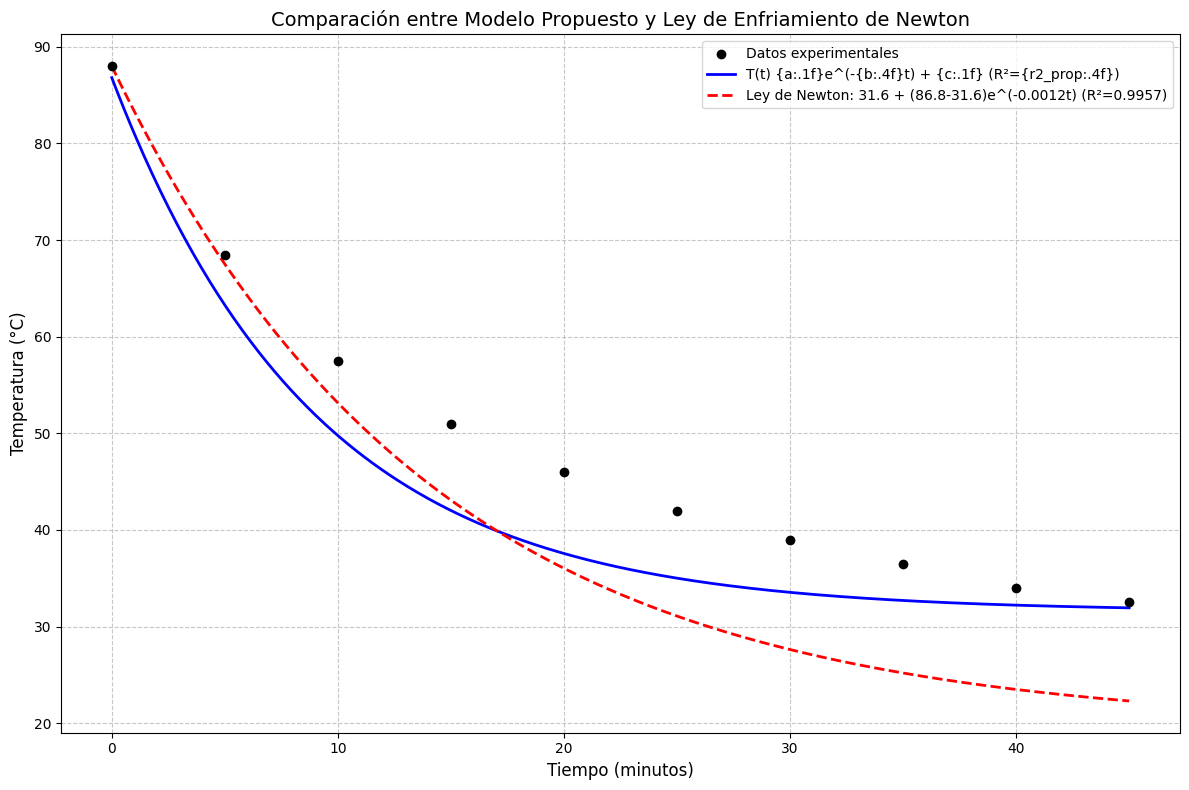

In [28]:
# Graficar comparativo
plt.figure(figsize=(12, 8))

# Datos experimentales
plt.scatter(t/60, T, color='black', label='Datos experimentales', zorder=3)

# Modelo propuesto
plt.plot(t_fit/60, expe(t_fit), 'b-', linewidth=2, 
         label=r'T(t) {a:.1f}e^(-{b:.4f}t) + {c:.1f} (R²={r2_prop:.4f})')

# Modelo de Newton
plt.plot(t_fit/60, modelo(t_fit), 'r--', linewidth=2, 
         label=f'Ley de Newton: {T_env_newton:.1f} + ({T0_newton:.1f}-{T_env_newton:.1f})e^(-{k:.4f}t) (R²={r2_newton:.4f})')

plt.xlabel('Tiempo (minutos)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title('Comparación entre Modelo Propuesto y Ley de Enfriamiento de Newton', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()